In [1]:
import math
import random

def sort(arrayA):
    maxdepth = (math.log(len(arrayA))) * 2
    p = 0
    r = len(arrayA) - 1
    introsort(arrayA, p, r, maxdepth)

def introsort(arrayA, p, r, depthLimit):
    n = r - p + 1
    if n <=16:
        insertion_sort(arrayA)
    elif depthLimit == 0:
        heapSort(arrayA, p, r)
    else:   
        q = random.randrange(p, r + 1)
        new_q = partition(arrayA,p, r, q)
        introsort(arrayA, p, new_q - 1, depthLimit - 1)
        introsort(arrayA, new_q + 1, r, depthLimit - 1)

def heapify(A, n, i):
    largest = i     #Initialize largest as root
    l = 2 * i + 1
    r = 2 * i + 2

    #See if left child of root exists and is > root
    if l < n and A[largest] < A[l]:
        largest = l
    
    #See if right child of root exists and is > root
    if r < n and A[largest] < A[r]:
        largest = r
    
    #Change root, if needed
    if largest != i:
        A[i], A[largest] = A[largest], A[i] #Swap

        #Heapify the root
        heapify(A, n, largest)
#A is array, p is start, r is end
def heapSort(A, p, r):
    #n is length
    n = r - p + 1

    #Build a max heap
    for i in range(n//2 - 1, -1, -1):
        heapify(A, n, i)
    
    #One by one extract elements
    for i in range(n - 1, 0, -1):
        A[i], A[0] = A[0], A[i] #Swap
        heapify(A, i, 0)

#p = start, r = end, q = pivot
def partition(A, p, r, q):
    pivot = A[q]
    tmp = []
    for i in range(p, q):
        tmp.append(A[i])
    for i in range(q + 1, r + 1):
        tmp.append(A[i])
    i = p
    j = r
    for t in tmp:
        if t <= pivot:
            A[i] = t
            i += 1
        else:
            A[j] = t
            j -= 1
    A[j] = pivot
    return j

def insertion_sort(lst):
    for i in range(len(lst)):
        key = lst[i]
        j = i-1
        while j >=0 and key < lst[j] :
                lst[j+1] = lst[j]
                j -= 1
        lst[j+1] = key

In [2]:
import time
def benchmark(sorting_algorithm, input_list):
    start_time = time.perf_counter()
    for i in range(10):
        lst = input_list.copy()
        sorting_algorithm(lst)
    end_time = time.perf_counter()
    total_time = end_time - start_time
    return total_time

In [3]:
list_size = [100, 1000, 10000, 100000]
import random
def generateBenchmarks(sortingAlgorithm, size, best, worst, average):
    orderedList = list(range(size))
    randList = orderedList.copy()
    random.shuffle(randList)
    reverseList = orderedList.copy()
    reverseList.reverse()
    best.append(benchmark(sortingAlgorithm, orderedList))
    average.append(benchmark(sortingAlgorithm, randList))
    worst.append(benchmark(sortingAlgorithm, reverseList))

In [4]:
intro_runtimes_best = []
intro_runtimes_worst = []
intro_runtimes_average = []

for i in range(len(list_size)):
    generateBenchmarks(sort, list_size[i], intro_runtimes_best, intro_runtimes_worst, intro_runtimes_average)

In [5]:
import numpy as np
from scipy.stats import linregress
m, b, _, _, _= linregress(np.log(list_size), np.log(intro_runtimes_worst))
print("Intro Sort Growth Worst", m)

m, b, _, _, _= linregress(np.log(list_size), np.log(intro_runtimes_average))
print("Intro Sort Growth Average", m)

m, b, _, _, _= linregress(np.log(list_size), np.log(intro_runtimes_best))
print("Intro Sort Growth Best", m)

Intro Sort Growth Worst 1.6840590544272145
Intro Sort Growth Average 1.8332726579954473
Intro Sort Growth Best 1.754149002688421


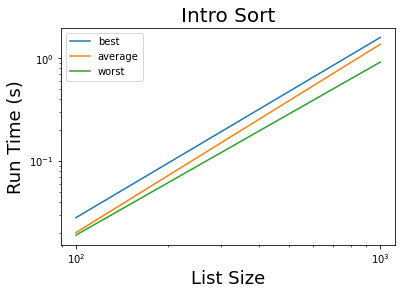

In [6]:
import matplotlib.pyplot as plt
#Insertion Sort With 3 Cases
plt.plot(list_size, intro_runtimes_best, label="best")
plt.plot(list_size, intro_runtimes_average, label="average")
plt.plot(list_size, intro_runtimes_worst, label="worst")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Intro Sort", fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend()